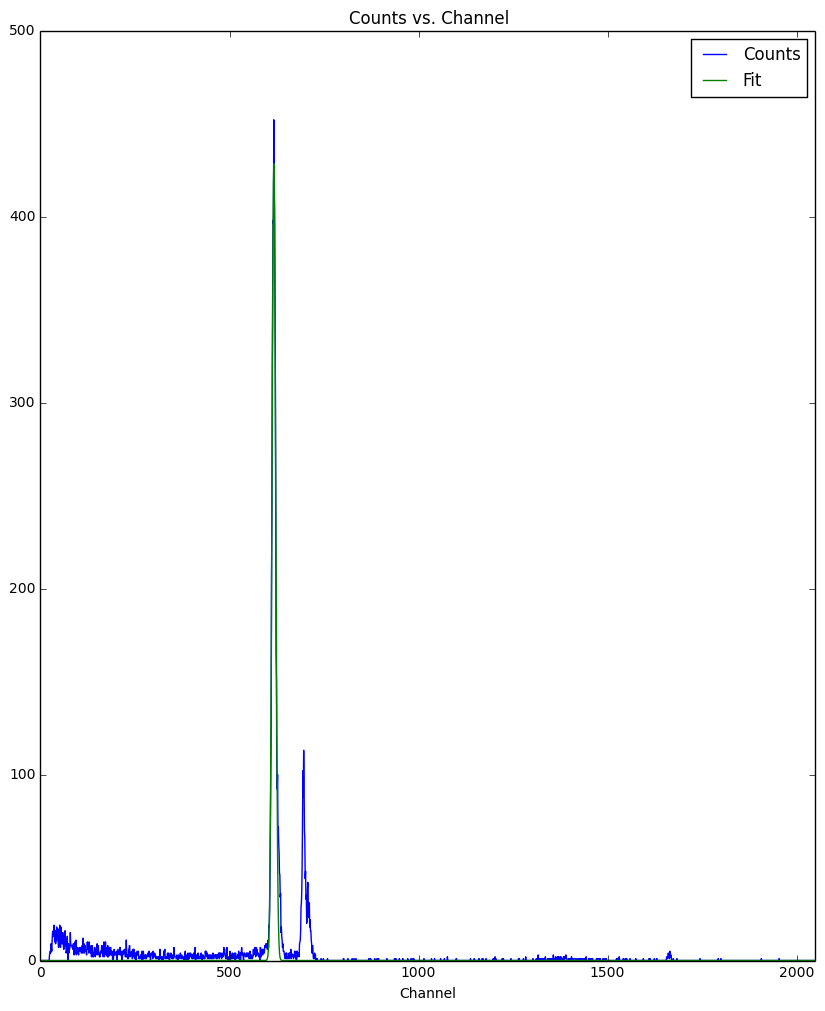

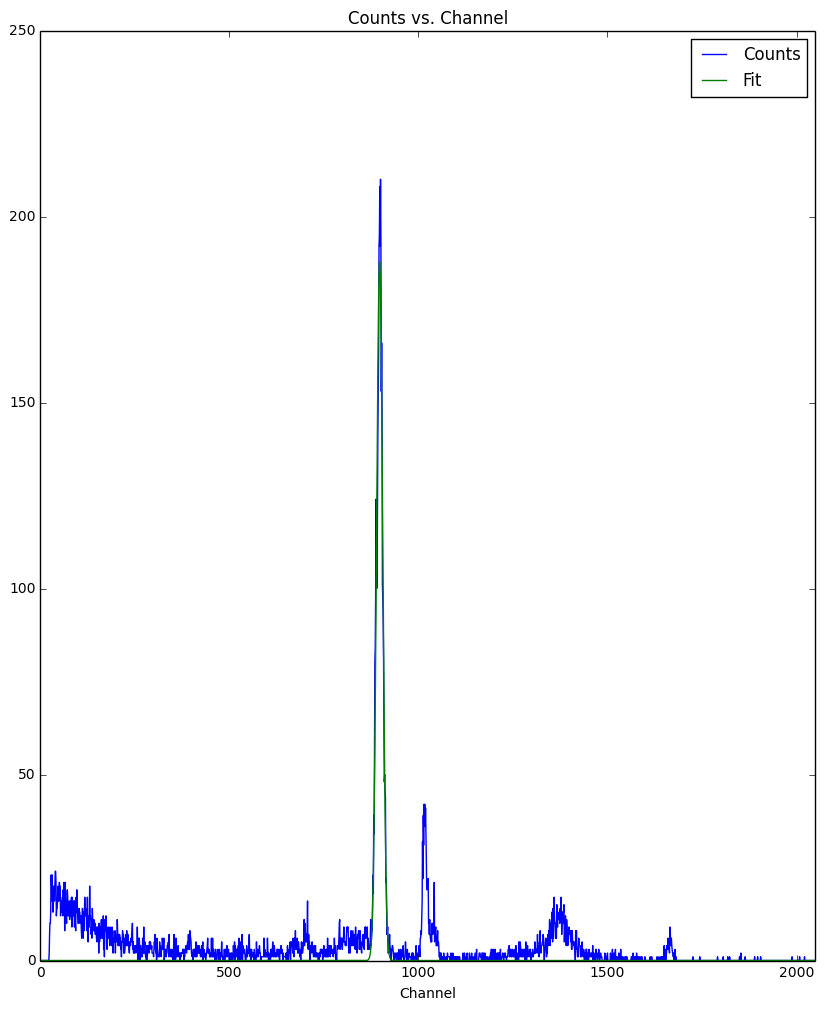

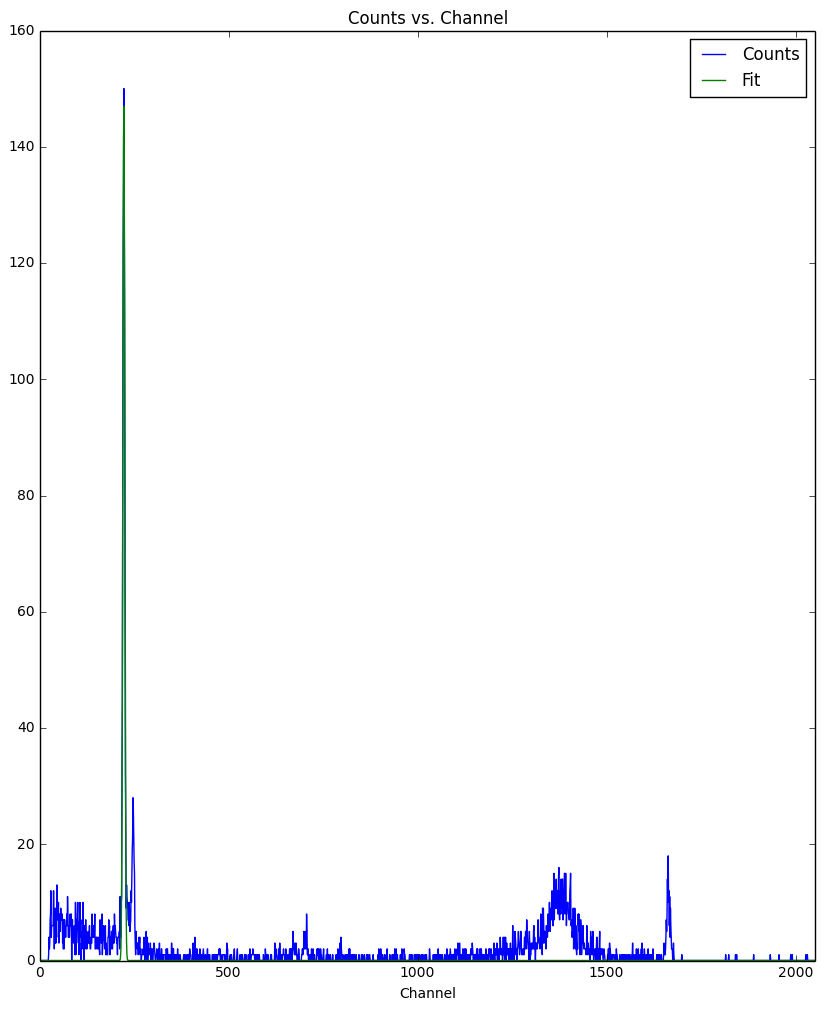

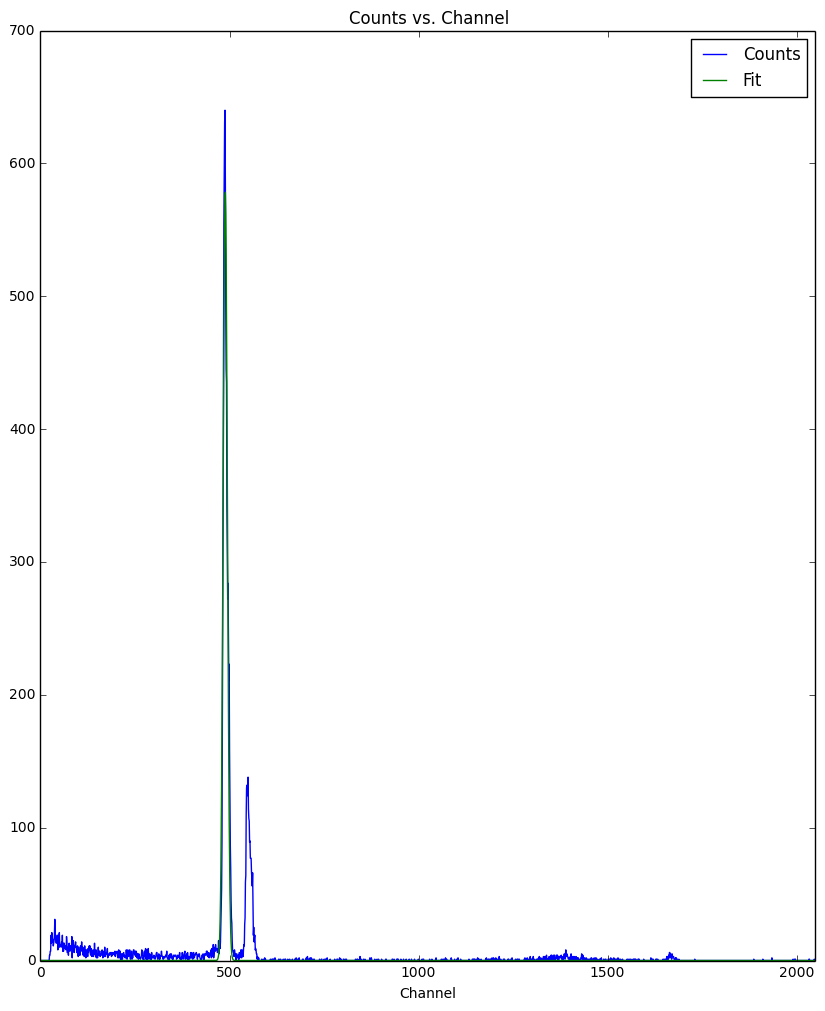

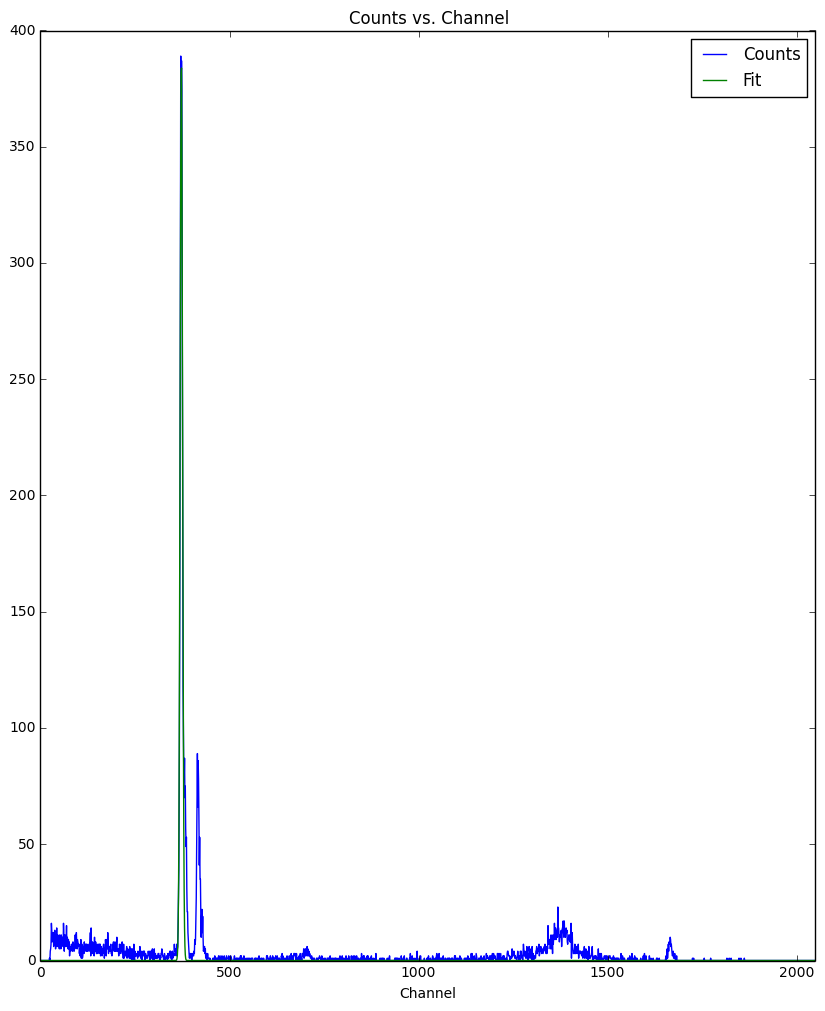

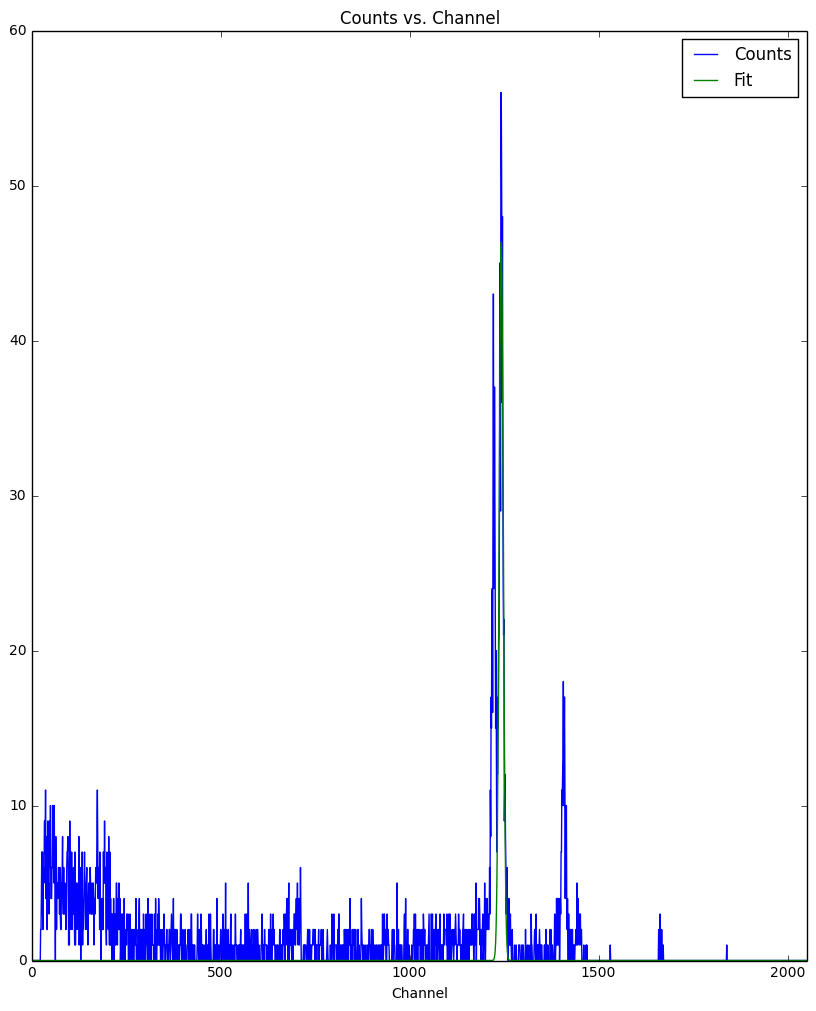

[22103.0361054, 32061.3492823, 8039.68044526, 17443.5305466, 13375.5092745, 44482] [617.11011058295639, 897.6777664809731, 222.74486318515062, 488.66361669987072, 372.55884025347791, 1241.7848057551516] [-4.9303254273642789, 8.1737920366982113, 2.6216706273303516, 5.6194367968584409, 3.2873332259650763, -5.4747361288142606]
                            WLS Regression Results                            
Dep. Variable:                      x   R-squared:                       1.000
Model:                            WLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.892e+05
Date:                Tue, 28 Nov 2017   Prob (F-statistic):           1.68e-10
Time:                        15:41:20   Log-Likelihood:                -32.517
No. Observations:                   6   AIC:                             69.03
Df Residuals:                       4   BIC:                             68.62
Df Model:                           1     

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/statsmodels/stats/stattools.py:72: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  "samples were given." % int(n), ValueWarning)
/System/Library/Frameworks/Python.framework/Versions/2.7/Extras/lib/python/matplotlib/collections.py:548: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


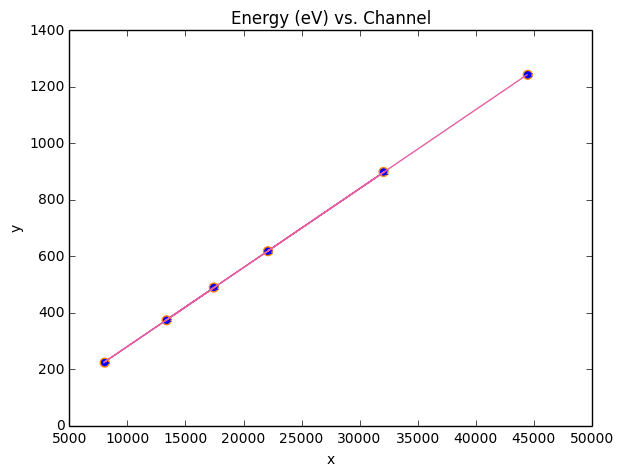

In [10]:
%matplotlib inline
import pandas
import numpy as np

import matplotlib.pyplot as plt
import analysis
reload(analysis)

ranges = [(580, 660), (850, 950), (220, 240), \
          (470, 525), (360, 400), (1230, 1255)]
energies = [22103.0361054, 32061.3492823, 8039.68044526, \
            17443.5305466, 13375.5092745, 44482]

calibration_files = ['Ag_9NOV.csv', 'Ba_9NOV.csv', 'Cu_09NOV.csv', \
                     'Mo_9NOV.csv', 'Rb_9NOV.csv', 'Tb_9NOV.csv']

data = []
means = []
stds = []

for index, calibration in enumerate(calibration_files):
    data = pandas.read_csv('data/' + calibration)
    a, mean, std = analysis.find_gaussian(data, ranges[index])
    means.append(mean)
    stds.append(std)
    data['Fit'] = data['Channel'].apply(lambda chan: analysis.gauss_function(chan, a, mean, std))
    plt.clf()
    fig = plt.figure()
    fig.set_size_inches(10, 12)
    ax = fig.add_subplot(111, axisbg='w')

    data.plot(
        x='Channel',
        y='Counts',
        ax=ax
    )
    
    data.plot(
        x='Channel',
        y='Fit',
        ax=ax,
        title='Counts vs. Channel'
    )
    
    plt.show()
    
params = analysis.find_regression(energies, means, stds)
wls_fit = params[2]
print(wls_fit.summary())
ws = params[3]

plt.clf()
fig = plt.figure()
ax = fig.add_subplot(111, axisbg='w')
ax_fit = ws.plot(
    kind='scatter',
    x='x',
    y='y',
    yerr='yerr',
    style='o',
    alpha=1.,
    ax=ax,
    title='Energy (eV) vs. Channel',
    edgecolor='#ff8300',
    s=40
)

# weighted prediction
wp, = ax.plot(
    wls_fit.predict(),
    ws['y'],
    color='#e55ea2',
    lw=1.,
    alpha=1.0,
)

plt.tight_layout()
fig.set_size_inches(6.40, 5.12)
plt.savefig("energy_fit.png", dpi=100, alpha=True)
plt.show()